In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

# dataset
data = pd.read_csv('letter-recognition.csv')

# Dimension
print("Dimension :", data.shape)

#Data Type
data.info()
# Show the first 5 column of the data
data.head()


Dimension : (20000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
# column names have a space, e.g. 'xbox ', which throws and error when indexed
data.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [5]:
# reindex the column names
data.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
order = list(np.sort(data['letter'].unique()))
order

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

<Axes: xlabel='letter', ylabel='xbox'>

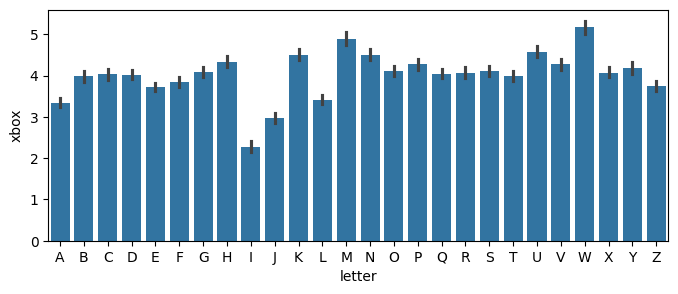

In [7]:
# Basic Plot using bar chart using matplotlib and seaborn
plt.figure(figsize = (8,3))
sns.barplot(x='letter',y='xbox',
            data = data,

            order = order)

In [8]:
#  calculates the mean of each numerical column in the DataFrame
letter_mean = data.groupby('letter').mean()
letter_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


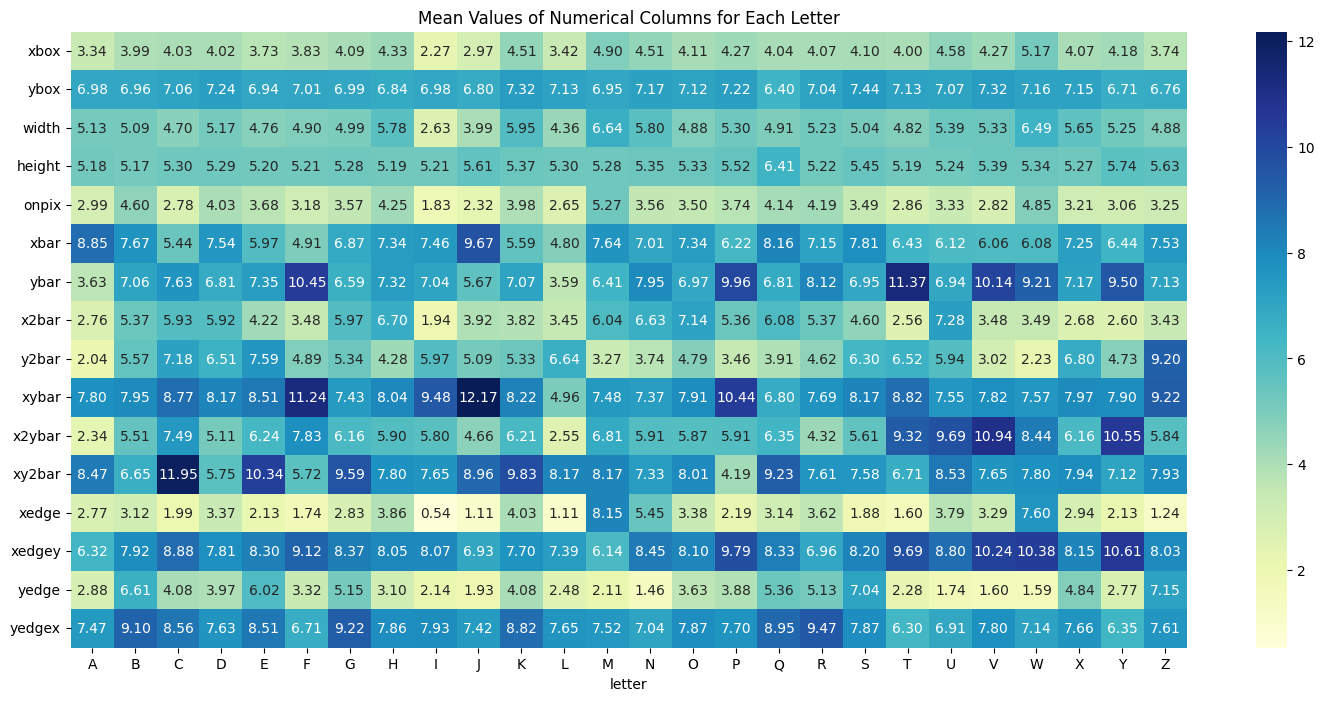

In [9]:
# show the heatmap
plt.figure(figsize =(18,8))
sns.heatmap(letter_mean.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Mean Values of Numerical Columns for Each Letter')
plt.show()

DATA PREPARATION

In [10]:
# Splitting Data
X = data.drop('letter',axis = 1)
y = data['letter']

# Scaling the feature
X_scaled = scale(X)

# split 70% data to the training sets and 30% to the test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 80)

BUILDING MODEL

In [11]:
# Linear model and predict
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train,y_train)
y_pred = model_linear.predict(X_test)

In [12]:
# Ecaluate the accuracy of the Linear Model and check the confusion matrix
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8493333333333334 

[[212   0   1   0   0   0   0   0   0   1   2   1   3   0   0   0   0   2
    1   0   0   0   0   0   2   0]
 [  3 197   0   3   0   0   6   7   0   1   0   0   0   1   0   2   0  10
    2   0   0   1   0   1   0   0]
 [  0   0 163   0   7   0   7   1   0   0   7   3   0   0   1   0   0   0
    1   0   1   0   0   0   0   0]
 [  0  10   0 233   0   0   0   2   1   1   0   0   1   3   2   0   0   3
    0   0   2   0   0   1   0   0]
 [  0   1   4   0 199   2   7   0   0   0   1   2   0   0   0   0   4   0
    4   3   1   0   0   2   0   3]
 [  0   0   0   1   1 229   0   1   0   3   0   0   0   1   0   5   0   0
    4   6   0   0   0   0   0   1]
 [  1   0  11   4   2   3 174   1   0   1   6   3   1   0   3   0   6   2
    6   0   0   3   1   0   0   0]
 [  0   5   3  13   0   6   2 154   0   4   9   0   0   0   7   2   3  12
    0   0   0   1   0   2   1   0]
 [  0   1   0   4   0   4   1   0 193   6   0   1   0   0   0   0   0   0
    6   0   0   0   0  

In [13]:
# Non-Linear Model
model_non_linear = SVC(kernel = 'rbf')
model_non_linear.fit(X_train,y_train)
y_pred = model_non_linear.predict(X_test)

In [14]:
# Evaluate the Non-Linear Model
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9431666666666667 

[[217   0   2   1   0   0   0   0   0   0   1   1   2   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  1 223   0   4   0   0   0   0   0   0   0   0   0   1   0   0   0   3
    0   0   0   0   0   1   1   0]
 [  0   0 176   0   5   0   7   1   0   0   1   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0 246   0   0   1   5   0   0   0   0   0   1   0   0   0   3
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 221   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   2   0   2]
 [  0   0   0   1   1 248   0   1   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   1   1   0 219   2   0   0   0   0   0   0   2   0   2   1
    0   0   0   0   0   0   0   0]
 [  0   1   1   7   0   0   1 196   0   0   2   0   0   0   1   1   3  10
    0   0   0   0   0   0   1   0]
 [  0   0   0   1   0   1   0   0 211   6   0   0   0   0   0   0   0   0
    2   0   0   0   0  

As a result, the Non-Linear model has more higher accuracy than the linear model which is the non-linear model accuracy rate is 95% and the linear one is 85%

## *Hyperparameter Tunning*
tune the model to find the optimal values of C and gamma corresponding to an RBF kernel.

In [19]:
# Create KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 80)
# Hyperparameters
# Set the param using cross-val
params = [{'gamma':[1e-2,1e-3,1e-4],
           'C':[1,10,100,1000]}]

# models
model = SVC(kernel = "rbf")

# Set-up Grid Search
model_cv = GridSearchCV(estimator = model,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=80, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [20]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.350054,0.749585,2.359827,0.241561,1,0.01,"{'C': 1, 'gamma': 0.01}",0.844286,0.835357,0.833571,...,0.836286,0.004301,7,0.844643,0.845089,0.845089,0.846339,0.849196,0.846071,0.001662
1,6.472970,0.356698,3.091617,0.367997,1,0.001,"{'C': 1, 'gamma': 0.001}",0.695714,0.680000,0.673571,...,0.682643,0.007248,11,0.689643,0.682857,0.694375,0.690000,0.690804,0.689536,0.003738
2,12.293814,0.375322,3.119221,0.337963,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.242143,0.255000,0.239643,...,0.249143,0.009353,12,0.259375,0.273839,0.255714,0.261250,0.269196,0.263875,0.006653
3,1.711092,0.089770,1.675945,0.322440,10,0.01,"{'C': 10, 'gamma': 0.01}",0.918929,0.905000,0.911786,...,0.910071,0.005931,3,0.926429,0.931696,0.928750,0.929286,0.927679,0.928768,0.001761
4,2.903466,0.388938,2.407564,0.340403,10,0.001,"{'C': 10, 'gamma': 0.001}",0.825357,0.807857,0.811071,...,0.813643,0.006418,8,0.820804,0.822679,0.821161,0.821518,0.824286,0.822089,0.001266
5,6.414174,0.445316,2.975742,0.315831,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.696071,0.680714,0.672857,...,0.683071,0.007685,10,0.689911,0.682768,0.693393,0.690625,0.690714,0.689482,0.003560
6,1.804143,0.014216,1.321710,0.274169,100,0.01,"{'C': 100, 'gamma': 0.01}",0.953929,0.942857,0.940714,...,0.943857,0.005128,2,0.977768,0.977143,0.979464,0.978571,0.977054,0.978000,0.000912
7,2.174543,0.371597,1.780971,0.291115,100,0.001,"{'C': 100, 'gamma': 0.001}",0.871071,0.859286,0.859643,...,0.863286,0.004388,5,0.875982,0.878661,0.879643,0.876696,0.877589,0.877714,0.001317
8,2.980319,0.347461,2.409398,0.342149,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.817143,0.801429,0.805000,...,0.808000,0.006097,9,0.817679,0.818125,0.816607,0.816696,0.818571,0.817536,0.000776
9,2.113926,0.115215,1.155459,0.248807,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.957143,0.950714,0.946786,...,0.950714,0.003507,1,0.997054,0.996339,0.997411,0.997054,0.996786,0.996929,0.000355


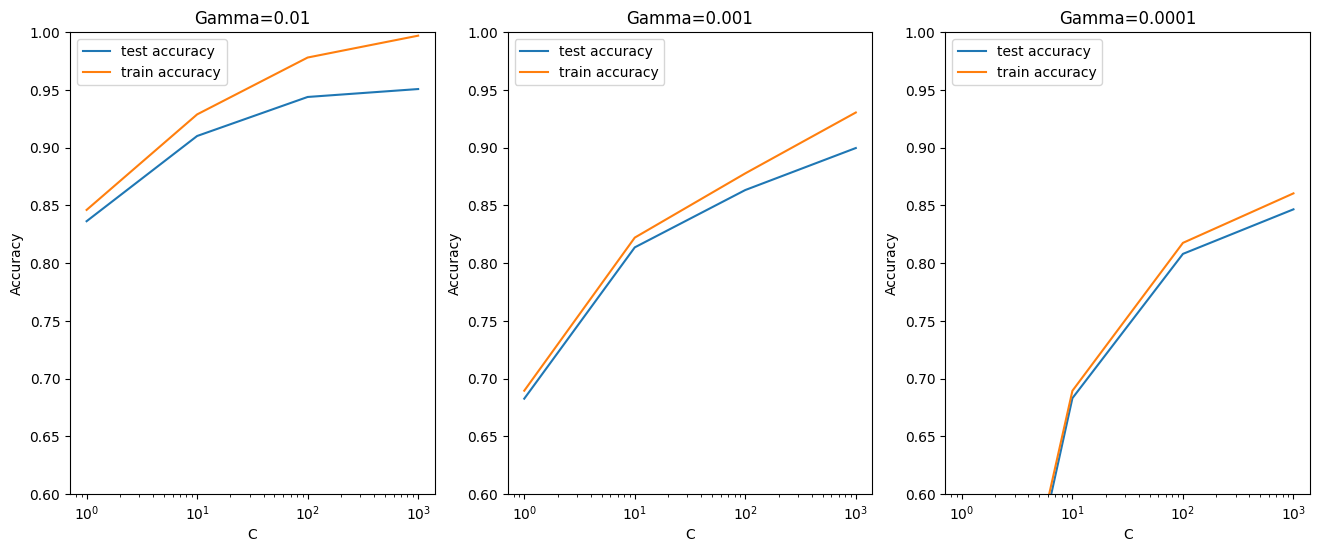

In [21]:
# convert C to numeric type for plotting on X-Axis
cv_results['param_C']
plt.figure(figsize = (16,6))
# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [22]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9507142857142858 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [23]:
# Final Models
model = SVC(C=1000, gamma=0.01, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy and Confusion Matrix
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9565 

[[219   0   1   1   0   0   0   1   0   0   0   1   0   0   0   0   0   0
    0   0   1   0   0   0   1   0]
 [  1 221   0   1   1   1   1   1   0   0   0   0   0   0   0   0   0   5
    1   0   0   1   0   0   0   0]
 [  0   0 177   0   4   0   5   0   0   0   2   0   0   0   2   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   2   0 247   0   0   1   5   0   0   0   0   0   1   0   0   1   1
    1   0   0   0   0   0   0   0]
 [  0   0   0   0 231   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   2   0 245   0   1   0   0   0   0   0   0   0   3   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   0   1   0 226   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   5   1   2   1 207   0   1   2   0   0   0   0   1   1   2
    0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   1   1   0 213   7   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0]
 

**CONCLUSION**
The accuracy achieved using a non-linear kernel is much higher than that of a linear one